Derive Spearman  Correlation of CDI and VHI

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import os

In [5]:
inputfile=r"C:\temp\temp\CDI_VHI_II_Merged_forest.csv"

Read the CSV file
Note: Use ';' as separator since the file uses semicolon delimiter

In [6]:
df = pd.read_csv(inputfile, sep=';', encoding='latin-1')

Calculate Spearman correlation coefficient

In [7]:
df_filtered = df[df['VHI'] != 110]
correlation, p_value = stats.spearmanr(df_filtered['CDI'], df_filtered['VHI'])

Lienar regression

In [8]:
# Prepare data for linear regression
X = df_filtered['CDI'].values.reshape(-1, 1)
y = df_filtered['VHI'].values

# Perform linear regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Calculate R-squared
r_squared = lin_reg.score(X, y)

# Calculate RMSE
y_pred = lin_reg.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))

Use a color palette that maximizes color distinction

In [9]:

from matplotlib.colors import hsv_to_rgb

def generate_distinct_colors(n):
    """
    Generate a list of maximally distinct colors
    Uses HSV color space to create perceptually distinct colors
    """
    hue_partition = 1.0 / n
    colors = [hsv_to_rgb((i * hue_partition, 1, 1)) for i in range(n)]
    return colors

Make scatterplot Based on Region

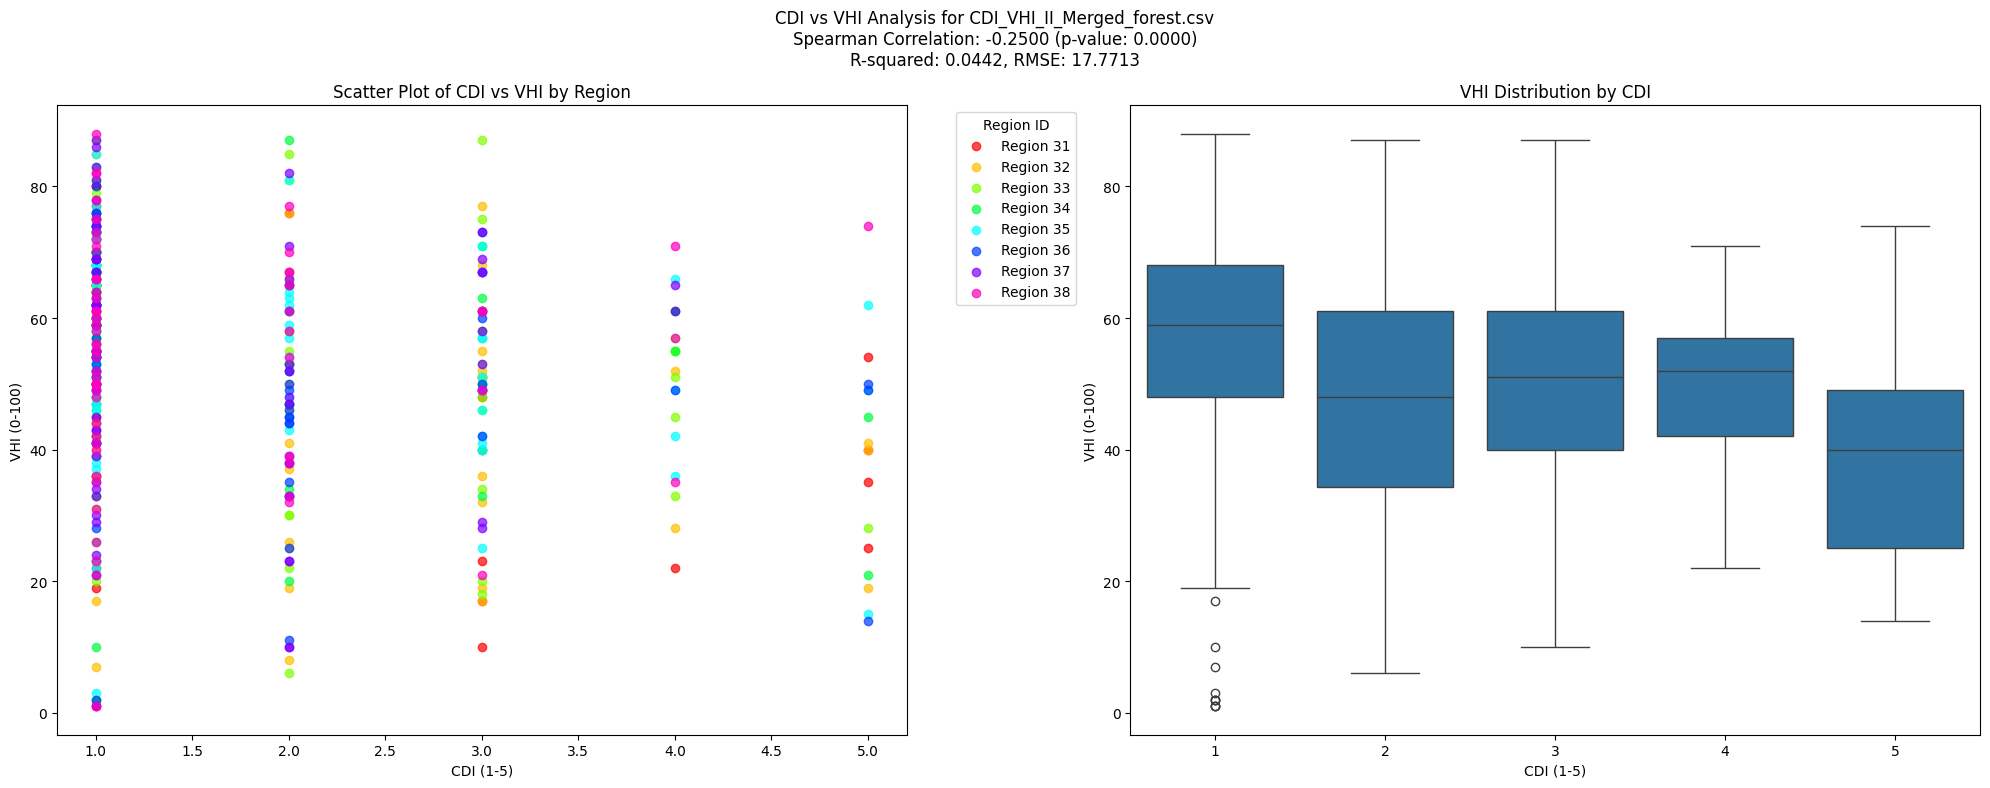

In [10]:
# Create the figure and axes
plt.figure(figsize=(20, 8))

# Create a subplot for the scatter plot
plt.subplot(1, 2, 1)
# Get unique Region IDs and create a color palette
unique_regions = df_filtered['Region_ID'].unique()
color_palette = generate_distinct_colors(len(unique_regions))

# Use scatter plot with manual color mapping
for region, color in zip(unique_regions, color_palette):
    subset = df_filtered[df_filtered['Region_ID'] == region]
    plt.scatter(subset['CDI'], subset['VHI'], 
                label=f'Region {region}', 
                color=color, 
                alpha=0.7)

plt.title('Scatter Plot of CDI vs VHI by Region')
plt.xlabel('CDI (1-5)')
plt.ylabel('VHI (0-100)')

# Adjust legend to show all regions
plt.legend(title='Region ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Create a subplot for the box plot
plt.subplot(1, 2, 2)
# Group by CDI and create a box plot of VHI for each CDI category
sns.boxplot(x='CDI', y='VHI', data=df_filtered)
plt.title('VHI Distribution by CDI')
plt.xlabel('CDI (1-5)')
plt.ylabel('VHI (0-100)')

# Add overall figure title with correlation, R-squared, and RMSE information
plt.suptitle(f'CDI vs VHI Analysis for {os.path.basename(inputfile)}\n'
             f'Spearman Correlation: {correlation:.4f} (p-value: {p_value:.4f})\n'
             f'R-squared: {r_squared:.4f}, RMSE: {rmse:.4f}', 
             fontsize=12)

plt.tight_layout()
plt.show()

In [11]:
# Print out additional statistical information
print(f"Spearman Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# Basic descriptive statistics
print("\nDescriptive Statistics:")
print(df_filtered[['CDI', 'VHI']].describe())

Spearman Correlation Coefficient: -0.24998870337537263
P-value: 3.830033403430779e-08

Descriptive Statistics:
              CDI         VHI
count  471.000000  471.000000
mean     1.753715   52.751592
std      1.087092   18.197377
min      1.000000    1.000000
25%      1.000000   42.000000
50%      1.000000   55.000000
75%      2.000000   66.500000
max      5.000000   88.000000


Add Color by year

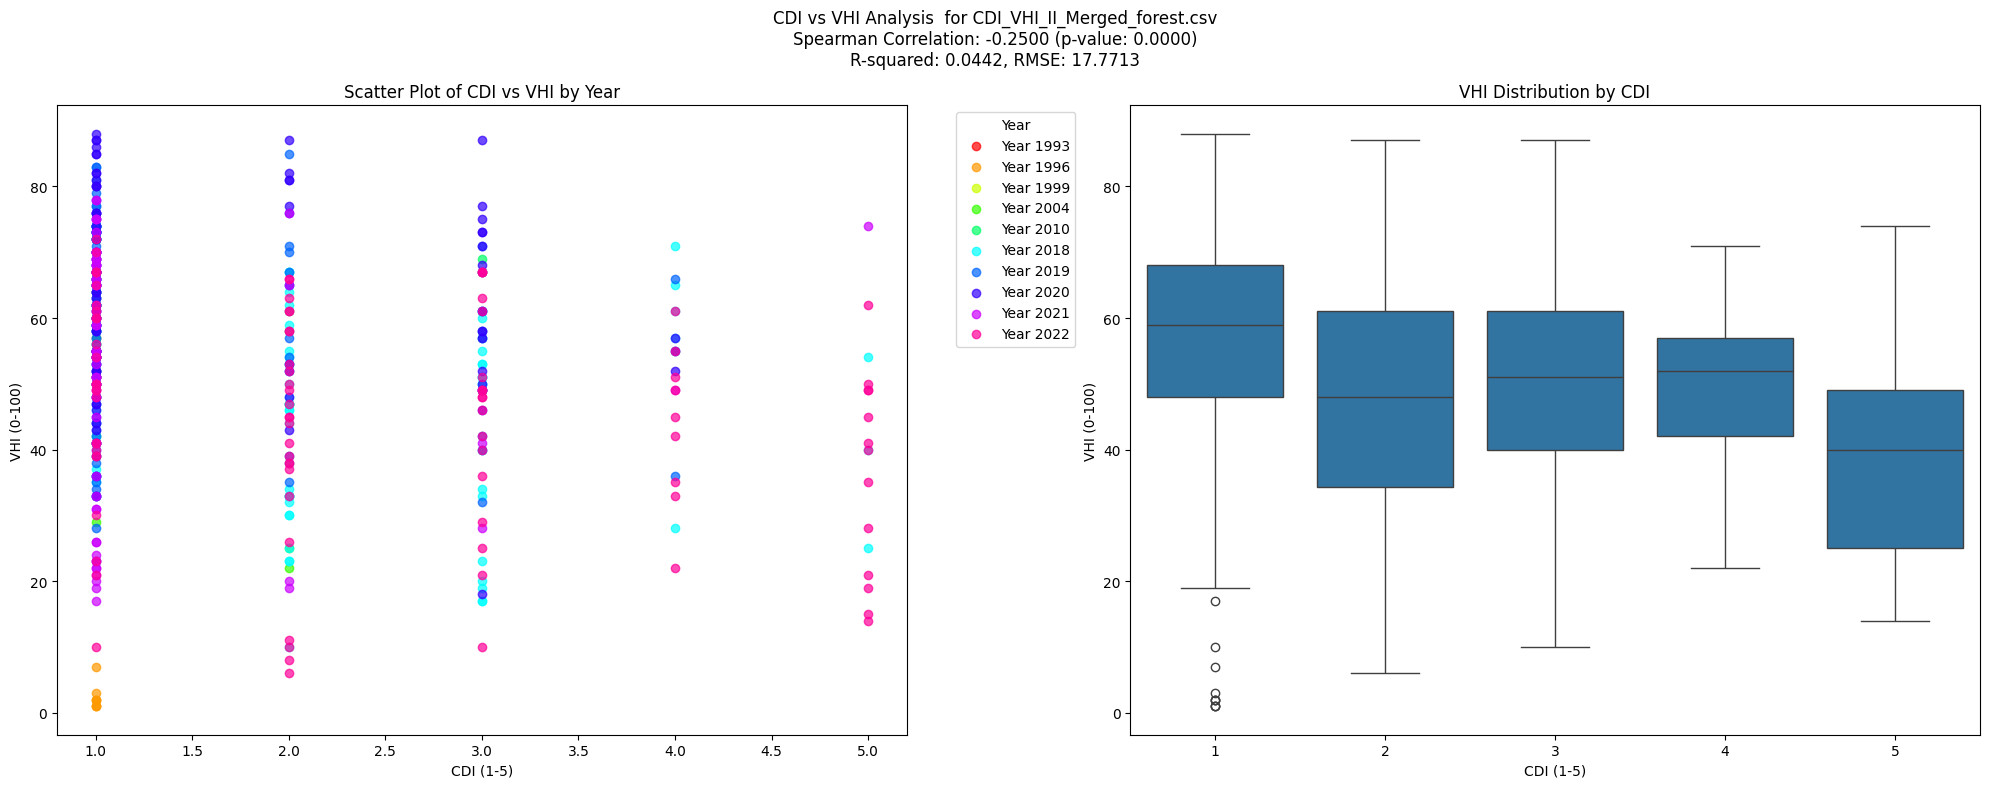

In [12]:
# Create the figure and axes
plt.figure(figsize=(20, 8))

# Create a subplot for the scatter plot
plt.subplot(1, 2, 1)

# Create a copy of the filtered DataFrame to avoid warnings
df_year = df_filtered.copy()

# Convert Datum to datetime and extract year
df_year['Year'] = pd.to_datetime(df_year['Datum']).dt.year

# Get unique Years and create a color palette
unique_years = df_year['Year'].unique()
color_palette = generate_distinct_colors(len(unique_years))

# Create the subplot for the scatter plot
plt.subplot(1, 2, 1)

# Use scatter plot with manual color mapping
for year, color in zip(unique_years, color_palette):
    subset = df_year[df_year['Year'] == year]
    plt.scatter(subset['CDI'], subset['VHI'], 
                label=f'Year {year}', 
                color=color, 
                alpha=0.7)

plt.title('Scatter Plot of CDI vs VHI by Year')
plt.xlabel('CDI (1-5)')
plt.ylabel('VHI (0-100)')

# Adjust legend to show all years
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
# Create a subplot for the box plot
plt.subplot(1, 2, 2)
# Group by CDI and create a box plot of VHI for each CDI category
sns.boxplot(x='CDI', y='VHI', data=df_filtered)
plt.title('VHI Distribution by CDI')
plt.xlabel('CDI (1-5)')
plt.ylabel('VHI (0-100)')

# Add overall figure title with correlation, R-squared, and RMSE information
plt.suptitle(f'CDI vs VHI Analysis  for {os.path.basename(inputfile)}\n'
             f'Spearman Correlation: {correlation:.4f} (p-value: {p_value:.4f})\n'
             f'R-squared: {r_squared:.4f}, RMSE: {rmse:.4f}', 
             fontsize=12)

plt.tight_layout()
plt.show()



Add Color by year for selected years

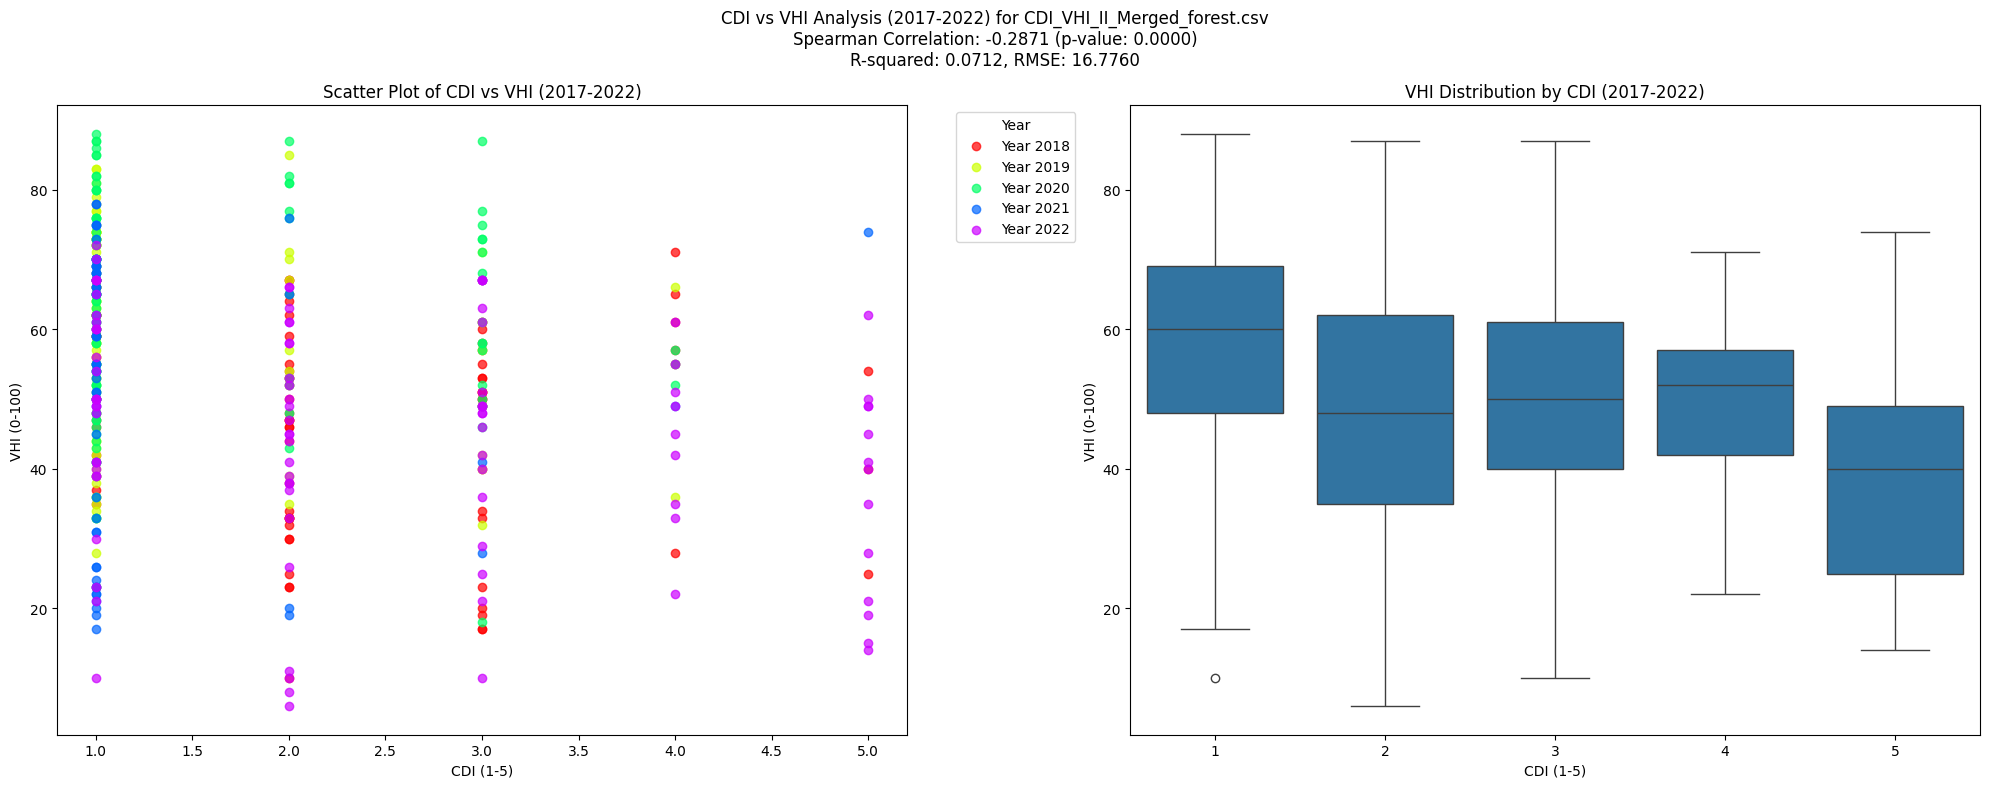

In [13]:
# Create the figure and axes
plt.figure(figsize=(20, 8))

# Create a copy of the filtered DataFrame to avoid warnings
df_year = df_filtered.copy()

# Convert Datum to datetime and extract year
df_year['Year'] = pd.to_datetime(df_year['Datum']).dt.year

# Filter for years 2017-2022
df_year_filtered = df_year[(df_year['Year'] >= 2017) & (df_year['Year'] <= 2022)]

# Get unique Years and create a color palette
unique_years = sorted(df_year_filtered['Year'].unique())
color_palette = generate_distinct_colors(len(unique_years))

# Create the subplot for the scatter plot
plt.subplot(1, 2, 1)

# Use scatter plot with manual color mapping
for year, color in zip(unique_years, color_palette):
    subset = df_year_filtered[df_year_filtered['Year'] == year]
    plt.scatter(subset['CDI'], subset['VHI'], 
                label=f'Year {year}', 
                color=color, 
                alpha=0.7)

plt.title('Scatter Plot of CDI vs VHI (2017-2022)')
plt.xlabel('CDI (1-5)')
plt.ylabel('VHI (0-100)')

# Adjust legend to show all years
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Create a subplot for the box plot
plt.subplot(1, 2, 2)
# Group by CDI and create a box plot of VHI for each CDI category
sns.boxplot(x='CDI', y='VHI', data=df_year_filtered)
plt.title('VHI Distribution by CDI (2017-2022)')
plt.xlabel('CDI (1-5)')
plt.ylabel('VHI (0-100)')

# Recalculate correlation and other metrics for the filtered data
correlation, p_value = stats.spearmanr(df_year_filtered['CDI'], df_year_filtered['VHI'])

# Prepare data for linear regression
X = df_year_filtered['CDI'].values.reshape(-1, 1)
y = df_year_filtered['VHI'].values

# Perform linear regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Calculate R-squared
r_squared = lin_reg.score(X, y)

# Calculate RMSE
y_pred = lin_reg.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Add overall figure title with correlation, R-squared, and RMSE information
plt.suptitle(f'CDI vs VHI Analysis (2017-2022) for {os.path.basename(inputfile)}\n'
             f'Spearman Correlation: {correlation:.4f} (p-value: {p_value:.4f})\n'
             f'R-squared: {r_squared:.4f}, RMSE: {rmse:.4f}', 
             fontsize=12)

plt.tight_layout()
plt.show()